In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
import os

Using TensorFlow backend.


In [2]:
from keras.utils import to_categorical

In [3]:
trainset=pd.read_excel(r"C:/Users/KIIT/Dataset/Classification_Dataset/TrainingSet.xlsx" , names =['vale1','vale2','vale3','vale4','vale5','vale6','vale7','vale8','vale9','vale10'])
trainlab=pd.read_excel(r"C:/Users/KIIT/Dataset/Classification_Dataset/Training Label.xlsx" , names = ['labels'])

In [4]:
trainset


,vale1,vale2,vale3,vale4,vale5,vale6,vale7,vale8,vale9,vale10
0,-0.132753,-0.163220,0.298510,-0.386726,0.934570,-0.386188,-0.292001,-0.211995,0.197731,-0.007056
1,-0.196359,-0.214179,0.295062,-0.257458,0.937696,-0.357075,-0.319707,-0.473274,0.159579,0.022640
2,-0.077665,-0.108193,0.374364,-0.218162,0.993907,-0.400560,-0.379472,-0.504703,0.209512,0.075953
3,-0.099537,-0.132895,0.315553,-0.334031,1.171973,-0.488372,-0.408483,-0.416131,0.057927,0.196741
4,-0.093664,-0.126818,0.277582,-0.362626,1.325761,-0.446401,-0.309932,-0.527190,-0.033661,0.207670
5,-0.071074,-0.101462,0.300357,-0.290092,1.024788,-0.406208,-0.348910,-0.428371,0.195205,0.062890
6,-0.069871,-0.111972,0.279140,-0.201363,1.004114,-0.442503,-0.355022,-0.330224,0.168673,0.017634
7,-0.068963,-0.118867,0.283830,-0.210582,0.929242,-0.374093,-0.325621,-0.323518,0.163830,-0.041561
8,-0.066107,-0.108463,0.281386,-0.209719,0.961061,-0.337995,-0.305571,-0.507315,0.168188,0.087584
9,-0.088034,-0.098137,0.328374,-0.358000,1.118687,-0.433385,-0.340641,-0.402243,0.209406,0.078348


In [5]:
trainset.insert(10 ,'labels' , trainlab)

In [6]:
trainset.shape                   

(17740, 11)

In [7]:
trainset = trainset.sample(frac=1)   #df.sample shuffles the dataset, frac=1 means we take whole dataset as sample

In [8]:
y = trainset.pop('labels').values

In [9]:
x = trainset.values

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val  = train_test_split(x, y, test_size=0.20, random_state=1) # 0.25 x 0.8 = 0.2
   

In [11]:
print((x_train.shape,y_train.shape))                 #Tranning set size

((14192, 10), (14192,))


In [12]:
print((x_val.shape,y_val.shape))                    #Validation set size

((3548, 10), (3548,))


In [13]:
y = keras.utils.to_categorical(y, 10)
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

In [14]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras_utils import reset_tf_session

In [68]:
s = reset_tf_session
model = Sequential()
model.add(Dense(40,activation='relu',input_shape=(10,)))
model.add(Dense(40,activation='relu'))
model.add(Dense(9,activation='softmax'))

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 40)                440       
_________________________________________________________________
dense_8 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_9 (Dense)              (None, 9)                 369       
Total params: 2,449
Trainable params: 2,449
Non-trainable params: 0
_________________________________________________________________


In [70]:
import keras_utils

In [71]:
 model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [72]:
x_train.size


141920

In [73]:
# Training
history = model.fit(x_train, y_train ,batch_size=32,  epochs=15, validation_data=(x_val, y_val),  callbacks=[keras_utils.TqdmProgressCallback()], verbose=0)


Epoch 1/15




Epoch 2/15




Epoch 3/15




Epoch 4/15




Epoch 5/15




Epoch 6/15




Epoch 7/15




Epoch 8/15




Epoch 9/15




Epoch 10/15




Epoch 11/15




Epoch 12/15




Epoch 13/15




Epoch 14/15




Epoch 15/15


In [74]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


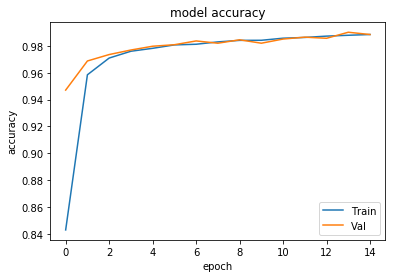

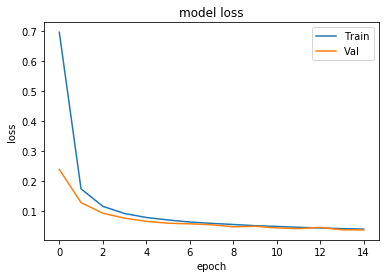

In [75]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [76]:
testset =pd.read_excel(r"C:/Users/KIIT/Dataset/Classification_Dataset/TestingSet.xlsx", names =['vale1','vale2','vale3','vale4','vale5','vale6','vale7','vale8','vale9','vale10'])


In [77]:
testlab =pd.read_excel(r"C:/Users/KIIT/Dataset/Classification_Dataset/Testing Label.xlsx", names = ['labels' ,'n','n','n','n','n','n'])

In [78]:
testlab=testlab.drop(columns=testlab.columns[[1,2,3,4,5,6]], axis=1)

In [79]:
testset.insert(10 ,'labels' , testlab)

In [80]:
testset = testset.sample(frac=1)   #df.sample shuffles the dataset, frac=1 means we take whole dataset as sample

In [81]:
y_test = testset.pop('labels').values

In [82]:
x_test = testset.values

In [83]:
y_test_oh = keras.utils.to_categorical(y_test, 10)

In [84]:
from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(x_test,batch_size=32)
acc_test = accuracy_score(y_test, y_pred)

7584/9572 [======================>.......] - ETA:  - ETA:  - ETA: 0s

In [85]:
print("Test set accuracy: {:.5f}".format(acc_test))

Test set accuracy: 0.94024


In [86]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[3325    0    0   46    2    0    9    0]
 [  13 1314    1    7    8  270    0    1]
 [   0    0 1289    0    0    1    4    0]
 [  28   10    2  378   30    0   32    0]
 [   0    0    0    0 1903    0   14    0]
 [   2    1    0    1    3  274    5    0]
 [  10    1    2    3   25    1  300    1]
 [   5    1    2    1    0    6   24  217]]


[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8')]

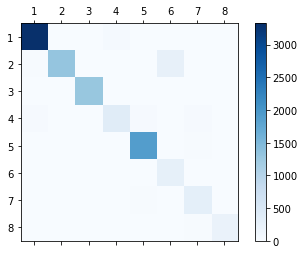

In [87]:
xlab = [0,1 , 2 ,3 ,4 ,5 ,6 ,7 ,8]
ylab = [0,1 , 2 ,3 ,4 ,5 ,6 ,7 ,8]
fig = plt.figure()
conf_img = fig.add_subplot(111)
confusion_matrix = conf_img.matshow(confusion , cmap=plt.cm.Blues )
fig.colorbar(confusion_matrix)
conf_img.set_xticklabels(xlab)
conf_img.set_yticklabels(ylab)

In [88]:
FP = confusion.sum(axis=0) - np.diag(confusion) 
FN = confusion.sum(axis=1) - np.diag(confusion)
TP = np.diag(confusion)
TN = confusion.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

sensitivity = TP/(TP+FN)        # Sensitivity

specificty = TN/(TN+FP)         # Specificity

ACC = (TP+TN)/(TP+FP+FN+TN)     # Overall accuracy for each class

In [89]:
sensitivity

array([0.98314607, 0.81412639, 0.99613601, 0.7875    , 0.99269692,
       0.95804196, 0.87463557, 0.84765625])

In [90]:
specificty

array([0.99063005, 0.99836642, 0.99915439, 0.99362077, 0.99111692,
       0.97006246, 0.99046484, 0.99978532])

In [91]:
ACC

array([0.98798579, 0.96730046, 0.99874634, 0.98328458, 0.99143335,
       0.9697033 , 0.98631425, 0.99571667])

In [92]:
ACC.sum()/8

0.985060593397409